In [2]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Checking and Removing Entries with Missing Values

In [4]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Normalization of Numerical Features

In [7]:
X = df.drop(columns = 'Exam_Score')
Y = df['Exam_Score']
features_to_be_scaled = []
for feature in X:
    if X[feature].nunique() > 5 and (X[feature].dtype == 'int64' or X[feature].dtype == 'float64'):
        features_to_be_scaled.append(feature)

features_to_be_scaled

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for feature in features_to_be_scaled:
    X[feature] = scaler.fit_transform(X[feature].values.reshape(-1, 1))

### One-Hot Encoding of Categorical Features

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

cat_features = []

for feature in X:
    if X[feature].nunique() >= 2 and X[feature].dtype == 'O':
        cat_features.append(feature)

X = pd.get_dummies(X, columns = cat_features)

In [10]:
df_new = pd.concat([X, Y], axis = 1)

In [11]:
df_new.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male,Exam_Score
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,False,True,False,True,...,False,False,True,False,False,False,True,False,True,67
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,False,True,False,False,...,False,True,False,False,False,True,False,True,False,61
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,False,False,True,False,...,False,False,False,True,False,False,True,False,True,74
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,False,True,False,False,...,False,False,True,False,False,True,False,False,True,71
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,False,False,True,False,...,False,True,False,False,False,False,True,True,False,70


C:\Users\Younus Ahmad\AppData\Local\Temp\ipykernel_8564\544215739.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


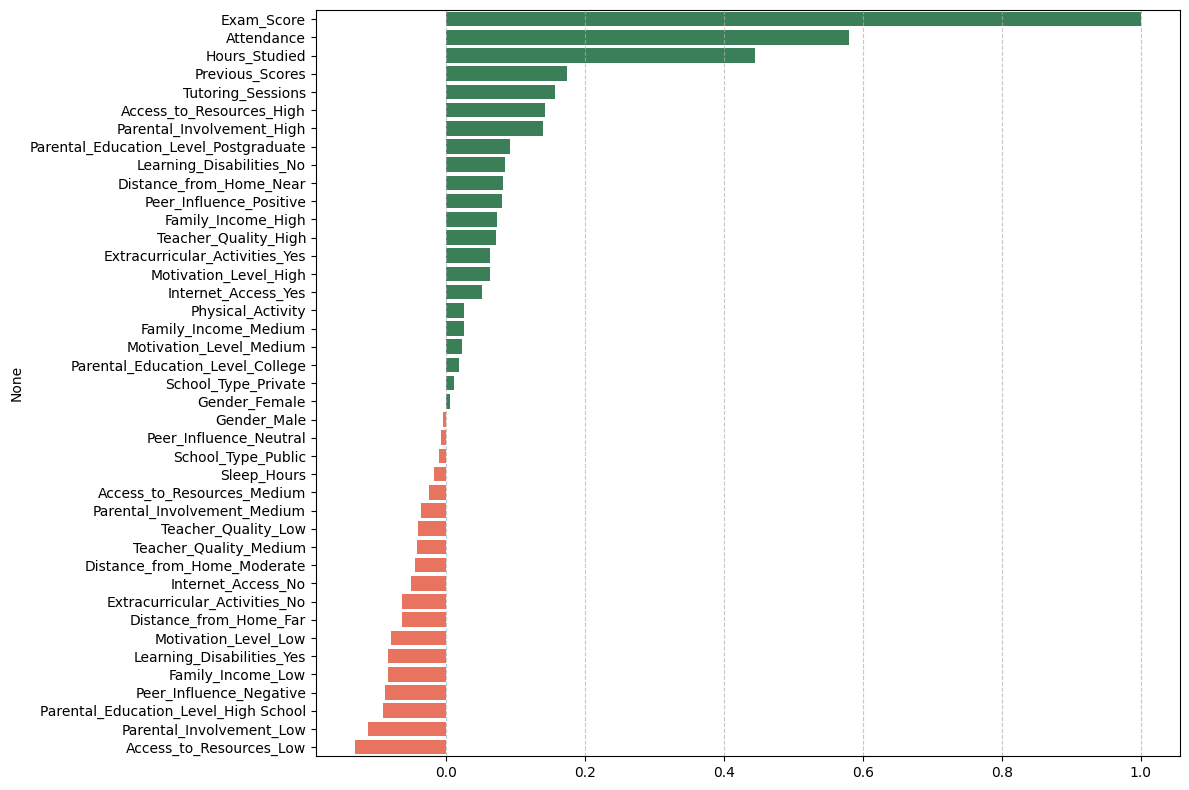

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_mtx = df_new.corr()
corr_score = corr_mtx["Exam_Score"].sort_values(ascending=False)

plt.figure(figsize=(12, 8), dpi=100)
sns.barplot(
    x = corr_score.values,
    y = corr_score.index,
    palette=["#2E8B57" if val > 0 else "#FF6347" for val in corr_score.values]
)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [106]:
corr_mtx['Exam_Score']

Hours_Studied                            0.445104
Attendance                               0.580259
Sleep_Hours                             -0.017171
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Physical_Activity                        0.025148
Parental_Involvement_High                0.139715
Parental_Involvement_Low                -0.112410
Parental_Involvement_Medium             -0.036191
Access_to_Resources_High                 0.141636
Access_to_Resources_Low                 -0.131276
Access_to_Resources_Medium              -0.024579
Extracurricular_Activities_No           -0.063063
Extracurricular_Activities_Yes           0.063063
Motivation_Level_High                    0.062872
Motivation_Level_Low                    -0.080061
Motivation_Level_Medium                  0.022508
Internet_Access_No                      -0.051124
Internet_Access_Yes                      0.051124
Family_Income_High                       0.073603
